In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Assumptions of the Normal distribution: PDF =f(x) = 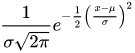  For a normal distribution, the probability density function for a continuous random variable  X follows a distribution that is always non-negative and where the total area over the entire domain is equal to 1.  The PDF follows a bell-shaped curve that is symmetric around the mean and where the mean=median=mode and has the parameters of the mean = $\mu$ and variance = $\sigma^2%$, so N($\mu$,$\sigma^2$).

Assumptions of the using the normal distribution :  Continuous data is used, normally distributed.

In [83]:
# Import Dataset
yields = pd.read_csv('batch-yields.csv')
yields

,Yield
0,79.9
1,70.3
2,85.6
3,84.9
4,78.3
...,...
295,69.2
296,81.9
297,73.9
298,78.6


In [84]:
yields.describe()

,Yield
count,300.000000
mean,80.353000
std,6.608181
min,62.400000
25%,75.300000
50%,80.600000
75%,84.125000
max,98.600000


In [85]:
np.std(yields,ddof=0)

Yield    6.597158
dtype: float64

<AxesSubplot:>

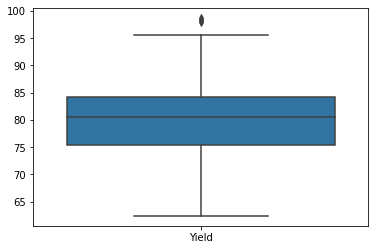

In [86]:
sns.boxplot(data=yields)

Is the distribution normal?

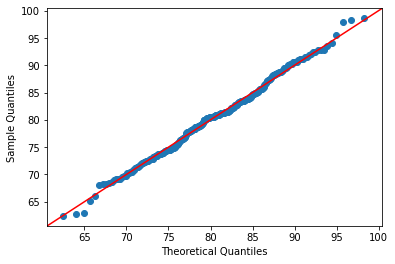

In [78]:
yieldsA=pd.DataFrame.sort_values(yields,by=["Yield"])
import statsmodels.api as sm
sm.qqplot((yieldsA),line='45',loc=80.353,scale=6.597)
plt.show()

In [88]:
from scipy import stats
stats.shapiro(yields)

ShapiroResult(statistic=0.9947869181632996, pvalue=0.4027233421802521)

What is the null hypothesis of the Shapiro-Wilks test?

reject the null that the sample is consistent with a normal distribution if p<0.05.

What is the population or theoretical mean:  $\mu_0$?

# A recorded yield value today was less than 60%, what are the chances of that occurring? 

What is the question asking about?  Is it asking about the probability of a value from the population or about the probability of a mean from an infered population of the sampling distribution of the sample means?

What is the value, X, that you are testing? 

What is the standard deviation?

What would this look like on the PDF?

In [91]:
from scipy.stats import norm

Text(0.5, 1.0, 'Normal Distribution with Mean=80.353, SD=6.597')

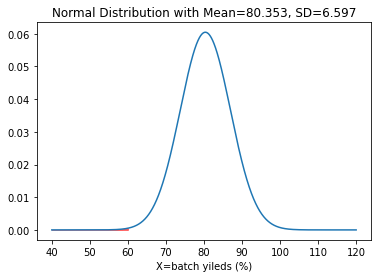

In [92]:
x_A = np.arange(40,120,.01)
normal_A=norm.pdf(x_A,loc=80.353,scale=6.597)
ax=sns.lineplot(x=x_A,y=normal_A)
ax=plt.fill_between(x_A,normal_A, where=(x_A<60),color='r',alpha=.5)
plt.xlabel("X=batch yileds (%)")
plt.title("Normal Distribution with Mean=80.353, SD=6.597")

A recorded yield value today was less than 60%, what are the chances of that occurring? 

First: Standardize.  
Second:  Find P(Z>=z).
Remember that the entire probability distribution =1 and that you can use the complement rule to find symmetrical probabilities for symmetrical probability distributions (such as z- and t- PDFs).  

In [93]:
z=(60-80.353)/6.597
z

-3.085190237986963

What is the probability of P(Z<z)?  

Look it up from a table. 

In [63]:
from scipy.stats import norm
norm.cdf(-3.085,loc=0,scale=1)

0.0010177607658036273

# What is the Z score at which the corresponding probability of P(Z<=z) would be equal to 0.25?

P(Z < z) = 0.25

Use standard normal table to find the Z value such that the area under the curve (the cumulative distribution function of the cumulative probility up to the Z value) =0.25. 

P(z<????) = 0.25

P(Z < z) = 0.25

Use standard normal table to find the Z value such that the area under the curve (the cumulative distribution function of the cumulative probility up to the Z value) =0.25. 

P(z<-0.675) = 0.25

Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

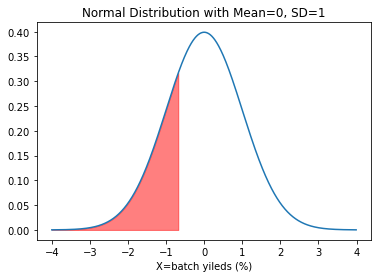

In [68]:
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax=sns.lineplot(x=x_A,y=normal_A)
ax=plt.fill_between(x_A,normal_A, where=(x_A<-0.675),color='r',alpha=.5)
plt.xlabel("X=batch yileds (%)")
plt.title("Normal Distribution with Mean=0, SD=1")

# What is the batch yield that corresponds to the value that 25% of batch yields fall below, or find x where P(X<=x)=0.25?

P(X<=x)=0.25?

P(z<= (x-$\mu$)/$\sigma$) =0.25?

if z=-0.675, what is x?

therfore: z= -0.675 = (x-80.353)/6.597 

standardizing transformation in reverse to solve for x: 

x = (-0.675*6.597) + 80.353 = 75.9%

In [94]:
norm.ppf(0.25,loc=0,scale=1)

-0.6744897501960817

In [95]:
norm.ppf(0.25,loc=80.353,scale=6.597)

75.90339111795645